In [10]:
pip install torch torchvision pillow

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.3 MB 2.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.6/1.3 MB 5.6 MB/s eta 0:00:01
   -------------------------------------- - 1.2/1.3 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install --upgrade numpy


  Using cached numpy-2.1.1-cp311-cp311-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.1.1-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.1.1 which is incompatible.


# Ignore unimportant warnings

In [43]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Import Libraries

In [1]:
import os
import cv2
import time
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys
import imageio
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Convert XLSX to CSV

In [2]:
import pandas as pd

# Define the Excel file and the target CSV output filename
excel_file = "C:/Users/qq/Downloads/archive (1)/Compressed/dataset_database.xlsx"
csv_output = "C:/Users/qq/Downloads/archive (1)/Compressed/output.csv"
sheet_name = "Sheet1"  # Replace with your desired sheet name if needed

# Read from an Excel file, using a specific sheet by its name or index (starts at zero)
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Write to CSV without the index column and preserving data types as strings
df.to_csv(csv_output, index=False, quoting=1, encoding='utf-8')

## Load data & pre-processing the dataset

In [3]:
import pandas as pd
from tensorflow import keras

# Set paths
BASE_PATH = "C:/Users/qq/Downloads/archive (1)/Compressed/dataset"
TABLENAME = "C:/Users/qq/Downloads/archive (1)/Compressed/output.csv"

# Load the CSV file
df = pd.read_csv(TABLENAME)

# Extract and convert collision data ('y' -> 1, 'n' -> 0)
labels = df['collision'].map({'y': 1, 'n': 0}).tolist()

# Load the image dataset with the collision labels
dataset = keras.preprocessing.image_dataset_from_directory(
    BASE_PATH,
    labels=labels,  # Assign converted collision labels
    batch_size=128,
    label_mode='int'
)

# Print the DataFrame columns
print(df.columns)

Found 10000 files belonging to 2 classes.
Index(['subject', 'collision'], dtype='object')


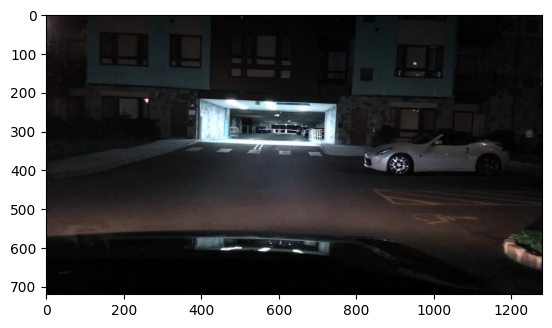

In [4]:
img = cv2.imread("C:/Users/qq/Downloads/archive (1)/Compressed/dataset/00012.jpg")
plt.imshow(img)

In [5]:
dataset = dataset.map(lambda x, y: (x / 255.0, y))

## Splitting the dataset into training and test dataset

In [6]:
train_size = int(len(dataset) * 0.8)
train_ds = dataset.take(train_size)
test_ds = dataset.skip(train_size)

tf.Tensor(0, shape=(), dtype=int32)


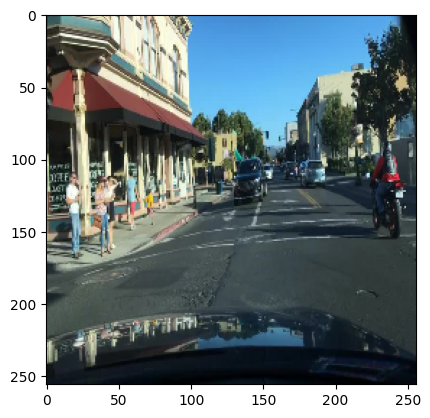

In [7]:
for t in train_ds.take(1):
    plt.imshow(t[0][0])
    print(t[1][0])

In [8]:
import pandas as pd

# Define the Excel file and the target CSV output filename
excel_file = "C:/Users/qq/Downloads/archive (1)/Compressed/dataset_database.xlsx"
csv_output = "C:/Users/qq/Downloads/archive (1)/Compressed/output.csv"
sheet_name = "Sheet1"  # Replace with your desired sheet name if needed

# Read from an Excel file
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Write to CSV without the index column and preserving data types as strings
df.to_csv(csv_output, index=False, quoting=1, encoding='utf-8')


# 도움 받은 데어터셋 코드

In [9]:
import os
import cv2
import time
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# GPU 로깅 수준 설정 (경고와 에러만 출력)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# 엑셀 파일과 출력할 CSV 파일의 경로를 정의합니다
excel_file = "C:/Users/qq/Downloads/archive (1)/Compressed/dataset_database.xlsx"
csv_output = "C:/Users/qq/Downloads/archive (1)/Compressed/output.csv"
sheet_name = 'Sheet1'  # 필요한 경우 사용할 시트 이름을 지정합니다

# 엑셀 파일에서 특정 시트를 읽어옵니다
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# 인덱스 컬럼을 제외하고 데이터를 CSV로 저장합니다
df.to_csv(csv_output, index=False, quoting=1, encoding='utf-8')

# 'collision' 컬럼에서 'y' 또는 'n'이 아닌 값을 찾음
invalid_values = df[~df['collision'].isin(['y', 'n'])]

In [10]:

import pandas as pd

# Load the Excel file to check for blank cells or missing data
file_path = "C:/Users/qq/Downloads/archive (1)/Compressed/dataset_database.xlsx"
data = pd.read_excel(file_path)

# Check for any missing (NaN) values in the dataset
missing_data = data.isnull().sum()

# Check the overall status of missing data
missing_data_summary = {
    "총 로우": data.shape[0],
    "총 컬럼": data.shape[1],
    "누락된 데이터를 포함한 열": missing_data[missing_data > 0].to_dict(),
    "데이터셋에 누락된 값": missing_data.sum()
}

print(missing_data_summary)

if (missing_data.sum() == 0):
    print('누락된 값이 없습니다.')
else:
    print('누락된 값이 있습니다.')

{'총 로우': 10000, '총 컬럼': 2, '누락된 데이터를 포함한 열': {}, '데이터셋에 누락된 값': 0}
누락된 값이 없습니다.


In [18]:
import pandas as pd
from tensorflow import keras

# CSV 파일 불러오기
df = pd.read_csv(csv_output)

# 충돌 데이터 추출 및 변환
labels = df['collision'].map({'y': 1, 'n': 0}).tolist()

# 이미지 데이터셋 로드
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/qq/Downloads/archive (1)/Compressed/dataset",
    labels=labels,
    batch_size=32,
    label_mode='int',
    image_size=(224, 224)
)

# 데이터프레임 컬럼 출력
print(df.columns)

Found 10000 files belonging to 2 classes.
Index(['subject', 'collision'], dtype='object')


In [19]:
# 데이터셋 정규화= 입력 데이터의 범위를 0과 1 사이로 정규화
dataset = dataset.map(lambda x, y: (x / 255.0, y))

In [20]:
# 훈련 데이터셋 분할
train_size = int(len(dataset) * 0.8)
train_ds = dataset.take(train_size)
test_ds = dataset.skip(train_size)


# 모델 SqueezeNet -> VGG16으로 변경

# vgg 모델 다시 불러오기, 커스터마이즈

In [31]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 3.6 MB/s eta 0:00:03
    --------------------------------------- 0.2/11.0 MB 2.5 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.0 MB 3.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.0 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.0 MB 5.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/11.0 MB 6.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.7/11.0 MB 8.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.8/11.0 MB 10.2 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/11.0 MB 12.4 MB/s eta 0:00:01
   -------

In [22]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# VGG16 모델 불러오기 (사전 훈련된 가중치와 함께)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 베이스 모델의 모든 레이어를 고정합니다
base_model.trainable = False

# 새로운 모델을 정의합니다
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # 풀링 레이어 추가
    Dense(1, activation='sigmoid')  # 출력 레이어 (이진 분류)
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

# 모델 훈련

In [23]:
# 훈련을 위한 콜백 정의 (옵션)
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    tf.keras.callbacks.ModelCheckpoint('vgg16_traffic_accident_model.keras', save_best_only=True)
]

# 모델 훈련
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,  # 필요에 따라 조정
    callbacks=callbacks
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 955s 4s/step - accuracy: 0.2499 - loss: 0.9141 - val_accuracy: 0.7970 - val_loss: 0.6014
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 615s 2s/step - accuracy: 0.7942 - loss: 0.5799 - val_accuracy: 0.8000 - val_loss: 0.5282
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 610s 2s/step - accuracy: 0.7974 - loss: 0.5305 - val_accuracy: 0.7985 - val_loss: 0.5162
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 610s 2s/step - accuracy: 0.7960 - loss: 0.5205 - val_accuracy: 0.7990 - val_loss: 0.5072
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 609s 2s/step - accuracy: 0.7984 - loss: 0.5087 - val_accuracy: 0.7980 - val_loss: 0.5015
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 607s 2s/step - accuracy: 0.7948 - loss: 0.5049 - val_accuracy: 0.7960 - val_loss: 0.4975
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 608s 2s/step - accuracy: 0.7961 - loss: 0.4957 - val_accuracy: 0.8010 - val_loss: 0.4839
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 608s 2s/step - accuracy: 0.7982 - loss: 0.4859 - val_accu

# 모델 평가

In [24]:
loss, accuracy = model.evaluate(test_ds)
print(f'테스트 데이터셋 손실: {loss:.4f}')
print(f'테스트 데이터셋 정확도: {accuracy:.4f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.7947 - loss: 0.4820
테스트 데이터셋 손실: 0.4762
테스트 데이터셋 정확도: 0.7960


# 결과 시각화

63/63 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.7975 - loss: 0.4739
테스트 데이터셋 손실: 0.4783
테스트 데이터셋 정확도: 0.7945
63/63 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step


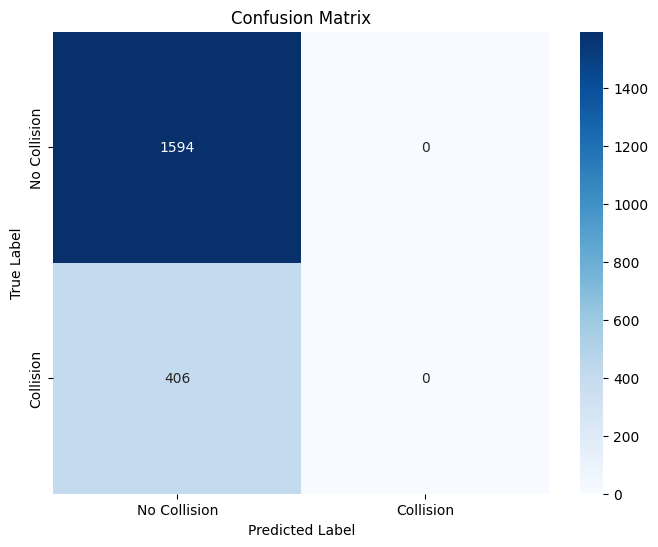

Classification Report:
               precision    recall  f1-score   support

No Collision       0.80      1.00      0.89      1594
   Collision       0.00      0.00      0.00       406

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



c:\Users\skrgu\Downloads\crawling\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\skrgu\Downloads\crawling\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\skrgu\Downloads\crawling\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 모델 평가
loss, accuracy = model.evaluate(test_ds)
print(f'테스트 데이터셋 손실: {loss:.4f}')
print(f'테스트 데이터셋 정확도: {accuracy:.4f}')

# 예측값 생성
test_images, test_labels = zip(*list(test_ds.unbatch()))
predictions = model.predict(np.stack(test_images))
predicted_labels = (predictions > 0.5).astype(int).flatten()  # 이진 분류

# 실제 레이블 변환
true_labels = np.array(test_labels)

# 혼동 행렬 계산
cm = confusion_matrix(true_labels, predicted_labels)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Collision', 'Collision'], 
            yticklabels=['No Collision', 'Collision'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 분류 보고서 생성
report = classification_report(true_labels, predicted_labels, target_names=['No Collision', 'Collision'])
print('Classification Report:\n', report)


['Malgun Gothic']


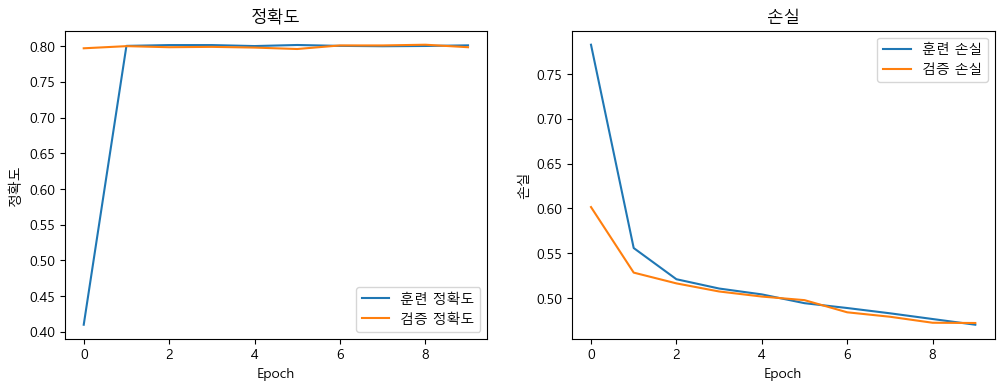

In [33]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 한글 폰트 설정 (예: Malgun Gothic)
rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우

# 한글 폰트 설정 확인
print(rcParams['font.family'])

def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='훈련 정확도')
    plt.plot(history.history['val_accuracy'], label='검증 정확도')
    plt.title('정확도')
    plt.xlabel('Epoch')
    plt.ylabel('정확도')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='훈련 손실')
    plt.plot(history.history['val_loss'], label='검증 손실')
    plt.title('손실')
    plt.xlabel('Epoch')
    plt.ylabel('손실')
    plt.legend()

    plt.show()

plot_history(history)